<table>
  <tr>
     <td><img src="images/RVSS-logo.png" width="400"></td>
  </tr>
</table>

# <center>Welcome to RVSS 2021</center>

This notebook will help you to:
- familirize yourself with the Amazon SageMaker Notebook that will be used during the **Tutorial** sessions
- test your setup in preparation for the summer school

## Selecting the Right Kernel

Different notebooks require different Python kernels. To change the kernel in use:
1. go to ***Kernel*** menu
2. select the option ***Change kernel***
3. choose ***conda_mxnet_p36***

Let us now run some basic Pytorch example taken from [Pytorch official website](https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html#sphx-glr-beginner-examples-nn-polynomial-nn-py)

Since the kernel we have selected does not include Pytorch, the code shown below fails to run. 

Go back to the ***Kernel*** menu and select ***conda_pytorch_p36***. Try to run the code again

In [1]:
import torch
import math

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("This code is runnin on a {}".format(device))

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

This code is runnin on a cpu
99 1243.711181640625
199 831.4501953125
299 557.0714721679688
399 374.3849182128906
499 252.69625854492188
599 171.6019287109375
699 117.53400421142578
799 81.4671859741211
899 57.395423889160156
999 41.320587158203125
1099 30.579769134521484
1199 23.39850616455078
1299 18.5941162109375
1399 15.377767562866211
1499 13.222984313964844
1599 11.778373718261719
1699 10.809138298034668
1799 10.158324241638184
1899 9.720969200134277
1999 9.426811218261719
Result: y = 0.014319254085421562 + 0.8366621732711792 x + -0.0024703091476112604 x^2 + -0.09047437459230423 x^3


## Testing OpenCV

The code shown below allows you to read and display an image. To run this code select the ***conda_mxnet_p36*** kernel

<IPython.core.display.Javascript object>


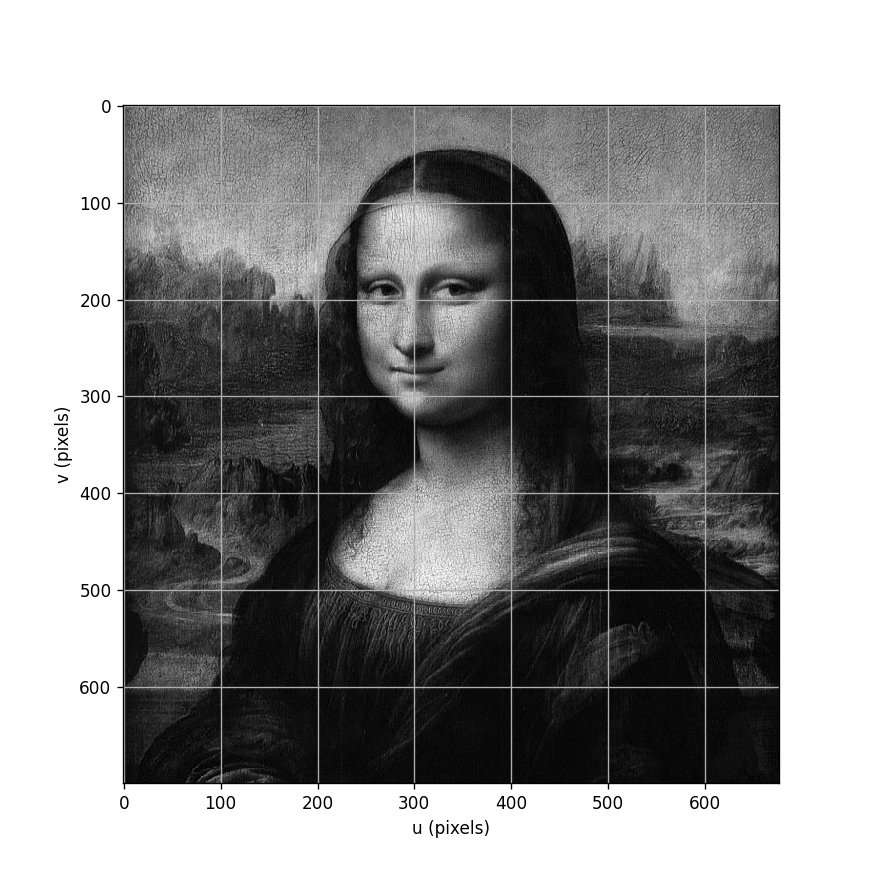

In [2]:
%matplotlib notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os.path
import math

# read an image with colors in RGB order for matplotlib
def iread(filename):
     return cv2.cvtColor(cv2.imread(os.path.join('images', filename)), cv2.COLOR_BGR2GRAY)

def idisp(image, title='Image', small=False, interaction=True, cmap='gray'):
    def mouse_move(self, event, image):
        if event.inaxes and event.inaxes.get_navigate():
            u = int(round(event.xdata))
            v = int(round(event.ydata))
            self.set_message("I[%d, %d] = %d" % (u, v, image[v,u]))
        
    if small:
        fig = plt.figure(figsize=(3,3))
    else:
        fig = plt.figure(figsize=(6,6))
    plt.rcParams['toolbar'] = 'None' 

    plt.imshow(image, cmap, interpolation='none')
    ax = plt.gca()
    plt.grid(True)
    plt.xlabel('u (pixels)')
    plt.ylabel('v (pixels)')
    #plt.title(title)
    if interaction:
        fig.canvas.toolbar._idDrag = fig.canvas.mpl_connect(
                        'motion_notify_event', 
                        lambda arg: mouse_move(fig.canvas.toolbar, arg, image))
    plt.show()
    
image = iread('monalisa.png')
idisp(image)

## Installing a Package

To add a package to a kernel, we can execute the following command in a code cell

```python 
import sys
!{sys.executable} -m pip install <package_name>```

After installation, the new package will be ready to use.

**<font color='blue'>[Important]</font>**: All packages installed within a notebook are lost once we stop the notebook instance. You will need to run the install command every time you start the notebook instance on Amazon SageMaker

In [3]:
import sys
!{sys.executable} -m pip install gym

Processing /home/prithvi/.cache/pip/wheels/d8/e7/68/a3f0f1b5831c9321d7523f6fd4e0d3f83f2705a1cbd5daaa79/gym-0.18.0-py3-none-any.whl
  Using cached Pillow-7.2.0-cp38-cp38-manylinux1_x86_64.whl (2.2 MB)
  Using cached pyglet-1.5.0-py2.py3-none-any.whl (1.0 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:
      Successfully uninstalled Pillow-8.0.1


Text(0.5, 1.0, 'Average return 21.82 +- 12.49')

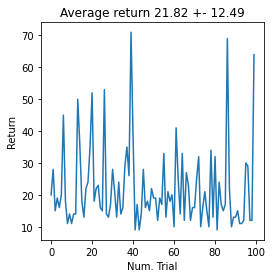

In [4]:
import gym
import io
import base64
from IPython.display import HTML
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

env = gym.make("CartPole-v0")
n_trials = 100
list_rewards = []

for i in range(n_trials):
    observation = env.reset()
    ep_return = 0
    done = False
    while not done:
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        ep_return += reward
    list_rewards.append(ep_return)
env.close()

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(list_rewards)
ax.set_xlabel("Num. Trial")
ax.set_ylabel("Return")
ax.set_title('Average return %s +- %s' % (np.round(np.mean(list_rewards),2), np.round(np.std(list_rewards), 2)))

# <font color='blue'>Things to Keep in Mind</font>

1. **Do not forget to stop the notebook instances once you are done**. Otherwise, you risk running out of credits
2. If you want to keep a copy of any changes you have made in a Jupyter notebook, you can download a copy of each notebook or set up a 2nd remote git repository. Instructions on how to set up this repo are provided in Moodle